# PROJECT-BI Churn

# Customer Churn Analysis
Context
The leading telecom company has a massive market share but one big problem: several rivals that are constantly trying to steal customers.  Because this company has been the market leader for so many years, there are not significant opportunities to grow with new customers.  Instead, company executives have decided to focus on their churn: the rate at which they lose customers.

They have two teams especially interested in this data: the marketing team and the customer service team.  Each team has its own reason for wanting the analysis. The marketing team wants to find out who the most likely people to churn are and create content that suits their interests.  The customer service team would like to proactively reach out to customers who are about to churn, and try to encourage them to stay.

They decide to hire you for two tasks:
Help them identify the types of customers who churn
Predict who of their current customers will churn next month

To do this, they offer you a file of 7,000 customers. Each row is a customer.  The Churn column will say Yes if the customer churned in the past month.  The data also offers demographic data and data on the services that each customer purchases.  Finally there is information on the payments those customers make.

Deliverables - What is expected

# Week 1


A presentation explaining churn for the marketing team - with links to technical aspects of your work. Tell a story to the marketing team to help them understand the customers who churn and what the marketing team can do to prevent it.  Highlight the information with helpful visualizations.


How much is churn affecting the business? How big is churn compared to the existing customer base?
Explain churn by the below categories. Are there any factors that combine to be especially impactful?
Customer demographics like age and gender
Services used
Billing information
What services are typically purchased by customers who churned? Are any services especially helpful in retaining customers?
Bonus! How long will it take for the company to lose all its customers?  Which demographics will they lose first?


# Data
# Data Preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore")

In [4]:
url="Dataset/datasets_13996_18858_WA_Fn-UseC_-Telco-Customer-Churn (2).csv"
df_bi = pd.read_csv(url)

In [5]:

df_bi.shape

(7043, 21)

In [6]:
df_bi.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
df_bi.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
df_bi.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [9]:
df_bi['TotalCharges'] = pd.to_numeric(df_bi['TotalCharges'],errors='coerce')

In [10]:
df_bi.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [11]:
df_bi.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [12]:
df_bi['TotalCharges'].dropna(inplace=True,axis=0)

In [13]:
df_bi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7032 non-null float64
Churn               7043 non-null object
dtypes: float64(2), int64(2), ob

In [14]:
df_bi.mean()

SeniorCitizen        0.162147
tenure              32.371149
MonthlyCharges      64.761692
TotalCharges      2283.300441
dtype: float64

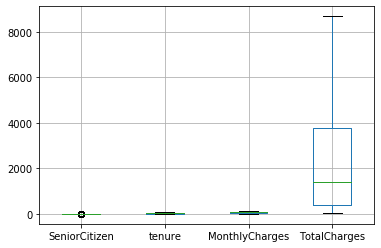

In [15]:
df_bi.boxplot()

# 1. 
# The churn of the customer  affect the business cause there's 1869 of customers are churn
# Here you can see how many customers who have churned

# We can see that there are about 5174 people who who have not Churn

In [16]:
#let's count the number of people churn or not
data_churn = df_bi['Churn']
data_count = data_churn.value_counts()
data_f = data_count.to_frame()
data_f


,Churn
No,5174
Yes,1869


# How big is churn compared to the existing customer base?

# Let's see  what percentage of clients are Churn or Not

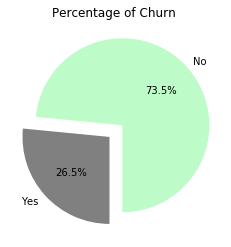

In [17]:
# How much is churn affecting the business
# Data to plot
sizes = df_bi['Churn'].value_counts(sort = True)
colors = ["#BDFCC9","grey"] 
explode = (0.1,0.1)
labels= ['No','Yes']
# Plot
plt.pie(sizes,colors=colors,labels=labels,explode=explode,autopct='%1.1f%%',startangle=270,)
plt.title('Percentage of Churn ')
plt.show()

# The amount of churn customers is 26.5% and 73.5% are still our customers

# 2. Explain churn by the below categories.

In [18]:
age_gender= df_bi.groupby(['SeniorCitizen','gender','Churn']).size().to_frame()
age_gender

0
SeniorCitizen gender Churn      
0             Female No     2221
                     Yes     699
              Male   No     2287
                     Yes     694
1             Female No      328
                     Yes     240
              Male   No      338
                     Yes     236

# Here we can see how many men are churn and we can see the men who churn and those who don't, including the women.

# Here we can see the customers who Churn by age at the next you'll see the chart

In [19]:
df_bi[['SeniorCitizen','Churn']].groupby(['Churn','SeniorCitizen']).size()/df_bi.Churn.count()

Churn  SeniorCitizen
No     0                0.640068
       1                0.094562
Yes    0                0.197785
       1                0.067585
dtype: float64

# Customer demographics like age and gender

# Customer who Churn and who don't Churn by Gender 

Text(0.5, 1.0, 'Customer demographics Churn by gender')

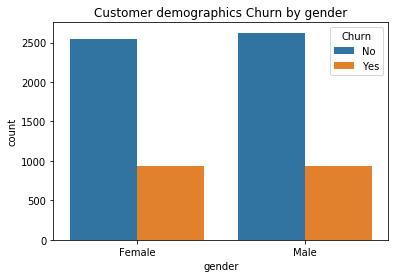

In [20]:
ax = sns.countplot(x="gender", hue="Churn", data=df_bi)
ax.set_title("Customer demographics Churn by gender")

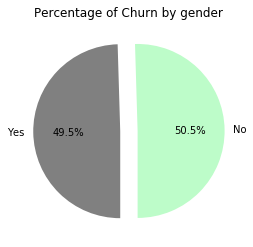

In [21]:

sizes = df_bi['gender'].value_counts(sort = True)
colors = ["#BDFCC9","grey"] 
explode = (0.1,0.1)
labels= ['No','Yes']
# Plot
plt.pie(sizes,colors=colors,labels=labels,explode=explode,autopct='%1.1f%%',startangle=270,)
plt.title('Percentage of Churn by gender')
plt.show()

# Customer who Churn and who don't Churn by Age 

Text(0.5, 1.0, 'Customer demographics Churn by age')

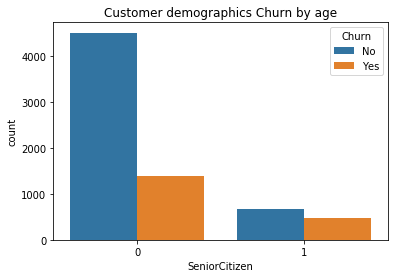

In [22]:
ax = sns.countplot(x="SeniorCitizen", hue="Churn", data=df_bi)
ax.set_title("Customer demographics Churn by age")


# We gouping all our Service

In [23]:
services= df_bi.groupby(['PhoneService','MultipleLines','InternetService','OnlineSecurity','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','PaymentMethod','Churn']).size().to_frame()
services

0
PhoneService MultipleLines    InternetService OnlineSecurity      DeviceProtection    TechSupport         StreamingTV         StreamingMovies     PaperlessBilling PaymentMethod             Churn    
No           No phone service DSL             No                  No                  No                  No                  No                  No               Bank transfer (automatic) No      3
                                                                                                                                                                                             Yes     4
                                                                                                                                                                   Credit card (automatic)   No      6
                                                                                                                                                                   Electronic check          No      8
                                                                                                                                                                                             Yes    10
...                                                                                                                                                                                                 ..
Yes          Yes              No              No internet service No internet service No internet service No internet service No internet service Yes              Credit card (automatic)   No     36
                                                                                                                                                                                             Yes     2
                                                                                                                                                                   Electronic check          No     12
                                                                                                                                                                   Mailed check              No     30
                                                                                                                                                                                             Yes     2

[1507 rows x 1 columns]

# Services used by Customers who's Churn and who's not Churn

# Count all customers who's Churn or not  use PhoneService

Text(0.5, 1.0, 'Customer demographics Churn by PhoneService ')

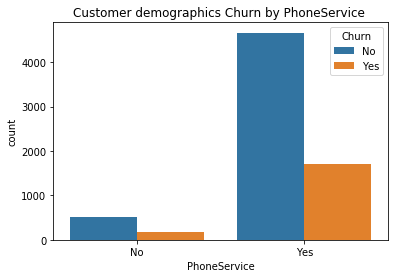

In [24]:
ax = sns.countplot(x="PhoneService", hue="Churn", data=df_bi)
ax.set_title("Customer demographics Churn by PhoneService ")

# Count all customers who's Churn or not  use InternetService

Text(0.5, 1.0, 'Customer demographics  InternetService in relation to Churn or not Churn')

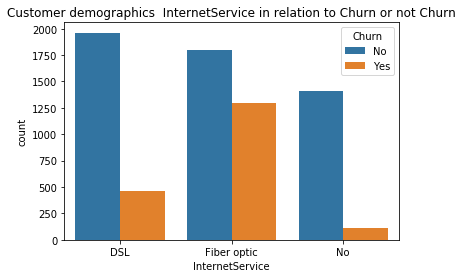

In [25]:
ax = sns.countplot(x="InternetService", hue="Churn", data=df_bi)
ax.set_title("Customer demographics  InternetService in relation to Churn or not Churn")

# Count all customers who's Churn or not  use StreamingTV

Text(0.5, 1.0, 'Customer demographics StreamingTV in relation to Churn or not Churn')

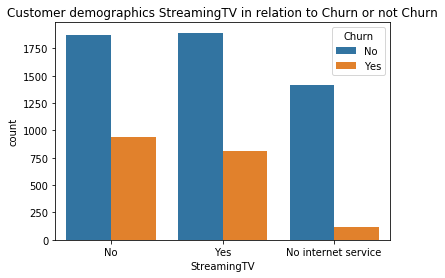

In [26]:
ax = sns.countplot(x="StreamingTV", hue="Churn", data=df_bi)
ax.set_title("Customer demographics StreamingTV in relation to Churn or not Churn")

# Count all customers who's Churn or not  use StreamingMovies

Text(0.5, 1.0, 'Customer demographics StreamingMovies in relation to Churn or not Churn')

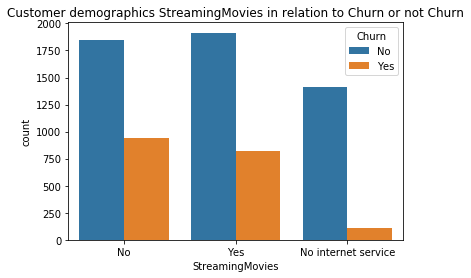

In [27]:
ax = sns.countplot(x="StreamingMovies", hue="Churn", data=df_bi)
ax.set_title("Customer demographics StreamingMovies in relation to Churn or not Churn")

# Count all customers who's Churn or not  use OnlineSecurity

Text(0.5, 1.0, 'Customer demographics  OnlineSecurity in relation to Churn or not Churn')

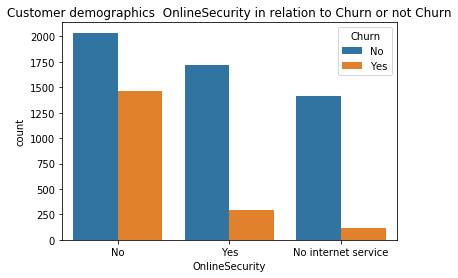

In [28]:
ax = sns.countplot(x="OnlineSecurity", hue="Churn", data=df_bi)
ax.set_title("Customer demographics  OnlineSecurity in relation to Churn or not Churn")

# Count all customers who's Churn or not  use OnlineBackup

Text(0.5, 1.0, 'Customer demographics OnlineBackup in relation to Churn or not Churn')

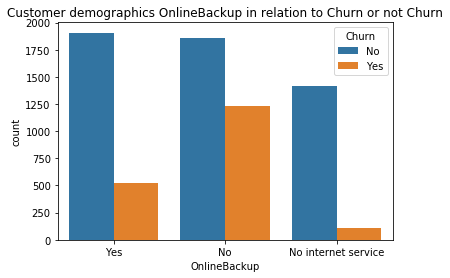

In [29]:
ax = sns.countplot(x="OnlineBackup", hue="Churn", data=df_bi)
ax.set_title("Customer demographics OnlineBackup in relation to Churn or not Churn")

# Count all customers who's Churn or not  use TechSupport

Text(0.5, 1.0, 'Customer demographics  TechSupport in relation to Churn or not Churn')

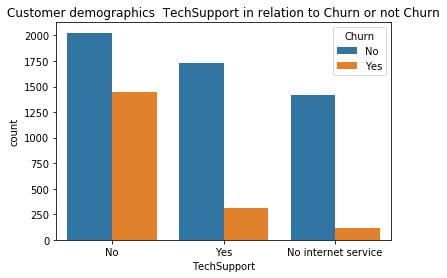

In [30]:
ax = sns.countplot(x="TechSupport", hue="Churn", data=df_bi)
ax.set_title("Customer demographics  TechSupport in relation to Churn or not Churn")

# Count all customers who's Churn or not  use MultipleLines

Text(0.5, 1.0, 'Customer demographics MultipleLines in relation to Churn or not Churn')

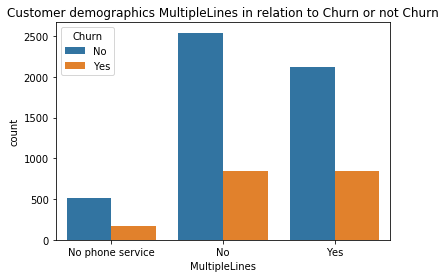

In [31]:
ax = sns.countplot(x="MultipleLines", hue="Churn", data=df_bi)
ax.set_title("Customer demographics MultipleLines in relation to Churn or not Churn")

# Count all customers who's Churn or not  use DeviceProtection

Text(0.5, 1.0, 'Customer demographics  DeviceProtection in relation to Churn or not Churn')

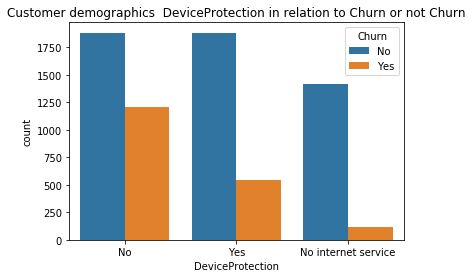

In [32]:
ax = sns.countplot(x="DeviceProtection", hue="Churn", data=df_bi)
ax.set_title("Customer demographics  DeviceProtection in relation to Churn or not Churn")

# Billing information
# The Churn Billing the compagny let's see by the information that we received by the company

In [33]:
df_bi['MonthlyCharges'].describe().to_frame()

,MonthlyCharges
count,7043.000000
mean,64.761692
std,30.090047
min,18.250000
25%,35.500000
50%,70.350000
75%,89.850000
max,118.750000


In [34]:
df_bi['PaymentMethod'].describe().to_frame()

,PaymentMethod
count,7043
unique,4
top,Electronic check
freq,2365


# We can see that the customer 

Text(0.5, 1.0, 'Customer demographics Churn by PaymentMethod ')

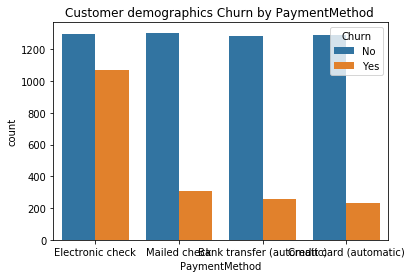

In [35]:
ax = sns.countplot(x="PaymentMethod", hue="Churn", data=df_bi)
ax.set_title("Customer demographics Churn by PaymentMethod ")

Text(0.5, 1.0, 'Customer demographics Churn by PaperlessBilling ')

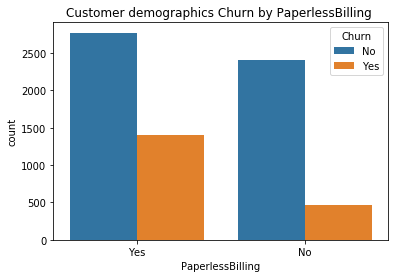

In [36]:
ax = sns.countplot(x="PaperlessBilling", hue="Churn", data=df_bi)
ax.set_title("Customer demographics Churn by PaperlessBilling ")

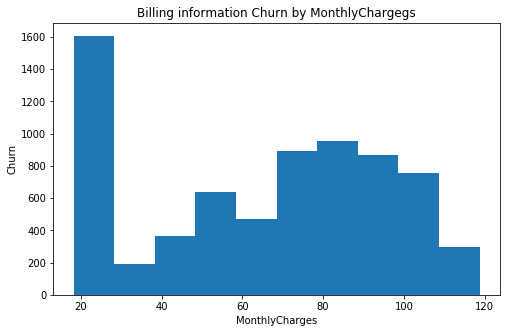

In [37]:
df_bi['MonthlyCharges'].plot(kind='hist', figsize=(8, 5))

plt.title('Billing information Churn by MonthlyChargegs') # add a title to the histogram
plt.ylabel('Churn') # add y-label
plt.xlabel('MonthlyCharges') # add x-label

plt.show()

In [38]:
df_bi['tenure'].describe().to_frame()

,tenure
count,7043.000000
mean,32.371149
std,24.559481
min,0.000000
25%,9.000000
50%,29.000000
75%,55.000000
max,72.000000


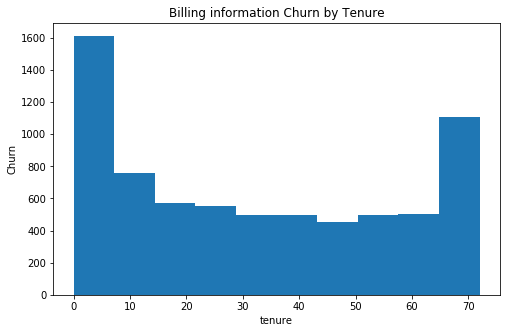

In [39]:
df_bi['tenure'].plot(kind='hist', figsize=(8, 5))

plt.title('Billing information Churn by Tenure') # add a title to the histogram
plt.ylabel('Churn') # add y-label
plt.xlabel('tenure') # add x-label

plt.show()

In [40]:
df_bi['TotalCharges'].describe().to_frame()

,TotalCharges
count,7032.000000
mean,2283.300441
std,2266.771362
min,18.800000
25%,401.450000
50%,1397.475000
75%,3794.737500
max,8684.800000


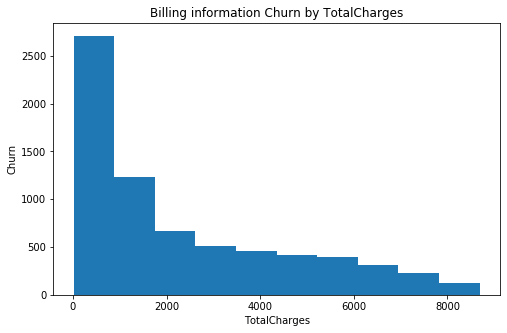

In [41]:
df_bi['TotalCharges'].plot(kind='hist', figsize=(8, 5))

plt.title('Billing information Churn by TotalCharges') # add a title to the histogram
plt.ylabel('Churn') # add y-label
plt.xlabel('TotalCharges') # add x-label

plt.show()



# 3.  Services are typically purchased by customers who churned

In [42]:
df_bi.Churn.replace(to_replace = {'Yes' == 1, 'No' == 0}, inplace = True)

In [43]:
cols = df_bi.columns
cols = list(cols)
display(cols)

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [44]:
services_1= df_bi.groupby('Churn').mean()
services_1

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
Churn,,,,
No,0.128721,37.569965,61.265124,2555.344141
Yes,0.254682,17.979133,74.441332,1531.796094


In [45]:
val = df_bi[df_bi.Churn=='Yes']
val

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7021,1699-HPSBG,Male,0,No,No,12,Yes,No,DSL,No,...,No,Yes,Yes,No,One year,Yes,Electronic check,59.80,727.80,Yes
7026,8775-CEBBJ,Female,0,No,No,9,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),44.20,403.35,Yes
7032,6894-LFHLY,Male,1,No,No,1,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,75.75,75.75,Yes
7034,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes


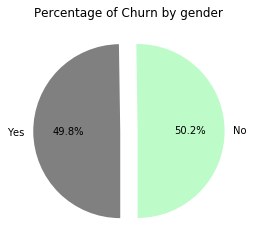

In [46]:

sizes = val['gender'].value_counts(sort = True)
colors = ["#BDFCC9","grey"] 
explode = (0.1,0.1)
labels= ['No','Yes']
# Plot
plt.pie(sizes,colors=colors,labels=labels,explode=explode,autopct='%1.1f%%',startangle=270,)
plt.title('Percentage of Churn by gender')
plt.show()

In [47]:
service= val.groupby(['PhoneService']).size().to_frame()
service

,0
PhoneService,
No,170
Yes,1699


In [48]:
service= val.groupby(['MultipleLines']).size().to_frame()
service

,0
MultipleLines,
No,849
No phone service,170
Yes,850


In [49]:
service= val.groupby(['InternetService']).size().to_frame()
service

,0
InternetService,
DSL,459
Fiber optic,1297
No,113


In [50]:
service= val.groupby(['OnlineSecurity']).size().to_frame()
service

,0
OnlineSecurity,
No,1461
No internet service,113
Yes,295


In [51]:
service= val.groupby(['DeviceProtection']).size().to_frame()
service

,0
DeviceProtection,
No,1211
No internet service,113
Yes,545


In [52]:
service= val.groupby(['TechSupport']).size().to_frame()
service

,0
TechSupport,
No,1446
No internet service,113
Yes,310


In [53]:
service= val.groupby(['StreamingTV']).size().to_frame()
service

,0
StreamingTV,
No,942
No internet service,113
Yes,814


In [54]:
service= val.groupby(['StreamingMovies']).size().to_frame()
service

,0
StreamingMovies,
No,938
No internet service,113
Yes,818


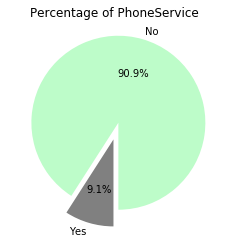

In [55]:
#percent of 90.5 % customer churn used phone service
sizes = val['PhoneService'].value_counts(sort = True)
colors = ["#BDFCC9","grey"] 
explode = (0.1,0.1)
labels= ['No','Yes'] 
# Plot
plt.pie(sizes,colors=colors,labels=labels,explode=explode,autopct='%1.1f%%',startangle=270,)
plt.title('Percentage of PhoneService ')
plt.show()

Text(0.5, 1.0, 'Customer demographics PhoneService ')

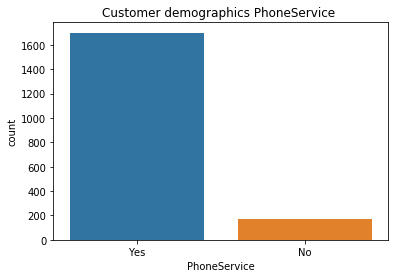

In [56]:
#gender who's use phone service 
ax = sns.countplot(x="PhoneService",data=val)
ax.set_title("Customer demographics PhoneService ")

In [57]:
service1= val.groupby(['MultipleLines','gender']).size().to_frame()
service1

0
MultipleLines    gender     
No               Female  443
                 Male    406
No phone service Female   80
                 Male     90
Yes              Female  416
                 Male    434

Text(0.5, 1.0, 'Customer demographics MultipleLines use it and left ')

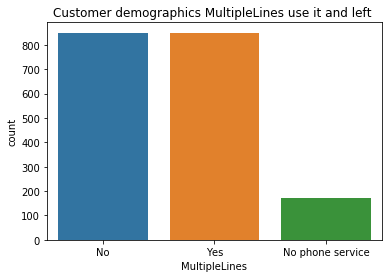

In [58]:
#gender who's used MultipleLines and left after
# leu yo gn service tel yo moins desabonne ke leu yo genyen
ax = sns.countplot(x="MultipleLines",data=val)
ax.set_title("Customer demographics MultipleLines use it and left ")

Text(0.5, 1.0, 'Customer demographics InternetService by Customer who Churn only')

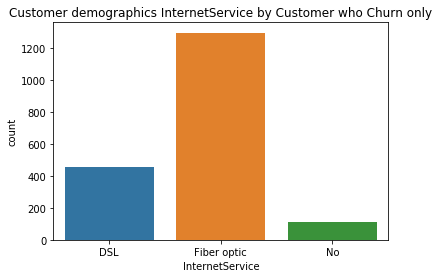

In [59]:
ax = sns.countplot(x="InternetService",data=val)
ax.set_title("Customer demographics InternetService by Customer who Churn only")

Text(0.5, 1.0, 'Customer demographics InternetService use by Customer who churn more ')

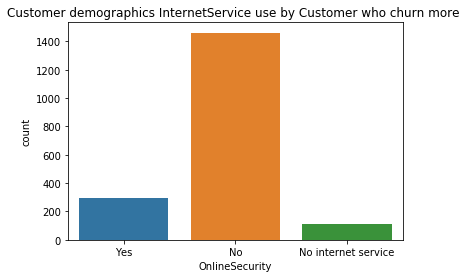

In [60]:
ax = sns.countplot(x="OnlineSecurity",data=val)
ax.set_title("Customer demographics InternetService use by Customer who churn more ")

Text(0.5, 1.0, 'Customer demographics InternetService use it and left ')

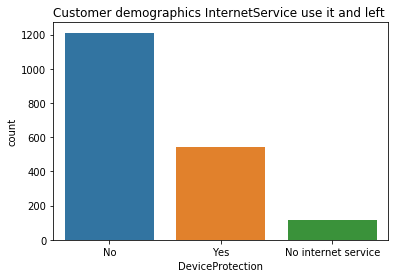

In [61]:
ax = sns.countplot(x="DeviceProtection",data=val)
ax.set_title("Customer demographics InternetService use it and left ")

Text(0.5, 1.0, 'Customer demographics InternetService use it and left ')

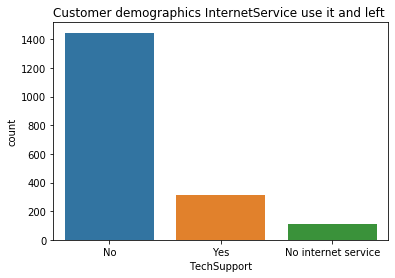

In [62]:
ax = sns.countplot(x="TechSupport",data=val)
ax.set_title("Customer demographics InternetService use it and left ")

Text(0.5, 1.0, 'Customer demographics InternetService use it and left ')

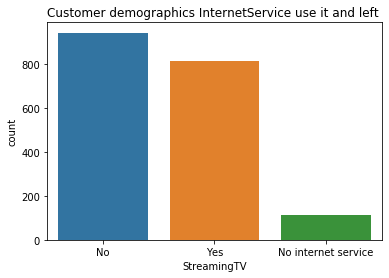

In [63]:
ax = sns.countplot(x="StreamingTV",data=val)
ax.set_title("Customer demographics InternetService use it and left ")

Text(0.5, 1.0, 'Customer demographics InternetService use it and left ')

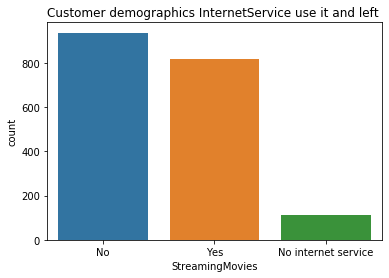

In [64]:
ax = sns.countplot(x="StreamingMovies",data=val)
ax.set_title("Customer demographics InternetService use it and left ")

# 4 BONUS !!!

In [65]:

round(df_bi['tenure'].mean(),2)

32.37

In [66]:
r=round(-[1+(np.log()/np.log(1-p))], 0) + 1


ValueError: invalid number of arguments

In [67]:
P_n0 = 7043*(1-.2654)**28
P_n = 7043*(1-.2654)**29
P_n1 = 7043*(1-.2654)**30
P_n0, P_n, P_n1

(1.2507875814186697, 0.9188285573101548, 0.6749714582000397)